In [1]:
from IPython.display import display, HTML

In [2]:
display(HTML("""
<style>
 .messagebox{
     border-radius: 2px;
     padding: 1.25em 1.5em;
     border: 1px solid;
 }
.messagelightgreen{
     border-color: hsl(164deg 95% 38%);
     color: rgb(5 139 102);
     background-color: rgb(236 255 250);
 }
 .messagelightgreen b{
     color:rgb(139 77 5);
 }
 .messagebrown{
     border-color: hsl(35deg 96% 62%);
    color: rgb(143 84 4);
    background-color: rgb(255 245 234);
 }
 .messagebrown b{
     color: rgb(5 139 102);
 }
</style>"""))

In [3]:
import pandas as pd

In [4]:
pd.set_option('display.max_columns', 9999999999)

In [5]:
import numpy as np

In [6]:
import plotly.express as px

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
import seaborn as sns

In [9]:
import matplotlib.pyplot as plt

In [10]:
import matplotlib as mpl

In [11]:
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)

In [12]:
from sklearn.metrics import confusion_matrix, classification_report

In [13]:
from sklearn import preprocessing, model_selection, metrics, feature_selection

In [14]:
from sklearn import metrics

In [15]:
from sklearn.model_selection import GridSearchCV, learning_curve

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
from sklearn.svm import SVC, LinearSVC

In [20]:
from sklearn.svm import SVC

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
from sklearn.feature_selection import f_classif

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
from sklearn.model_selection import KFold

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
from sklearn.model_selection import cross_val_predict

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
from tensorflow.keras.models import Sequential

In [29]:
from tensorflow.keras.layers import Dense, Activation,Conv1D,LSTM,Flatten

In [30]:
from tensorflow.keras.layers import Dense, Conv1D,LSTM,Flatten

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
from tensorflow.keras.utils import to_categorical, plot_model

In [33]:
import warnings
warnings.filterwarnings("ignore")

In [34]:
import glob

In [35]:
import os

In [36]:
data_df_list = []

In [37]:
rows=None

In [38]:
excel_file = "Datasets/Feature_Names.csv"
column_labels = pd.read_csv(excel_file, header=None).squeeze().tolist()

In [39]:
for file in glob.glob("Datasets/data_attack/*.csv"):
    tmp_df = pd.read_csv(file, nrows=rows, header=None)
    tmp_df.columns = column_labels
    tmp_df["target"] = "data-" + os.path.splitext(os.path.basename(file))[0]
    data_df_list.append(tmp_df)

In [40]:
data_df_list[0].head()

,pkSeqID,stime,flgs,proto,saddr,sport,daddr,dport,pkts,bytes,state,ltime,seq,dur,mean,stddev,smac,dmac,sum,min,max,soui,doui,sco,dco,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack,category,subcategory,target
0,6000001,1.528082e+09,e s,tcp,192.168.100.147,37439.0,192.168.100.6,80.0,3,462,REQ,1.528082e+09,88066,38.841385,0.000000,0.000000,NaN,NaN,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,3,0,462,0,0.051491,0.051491,0.0,1,DoS,TCP,data-UNSW_2018_IoT_Botnet_Dataset_7
1,6000002,1.528082e+09,e s,tcp,192.168.100.147,37440.0,192.168.100.6,80.0,3,462,REQ,1.528082e+09,88067,38.841385,0.000000,0.000000,NaN,NaN,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,3,0,462,0,0.051491,0.051491,0.0,1,DoS,TCP,data-UNSW_2018_IoT_Botnet_Dataset_7
2,6000003,1.528082e+09,e s,tcp,192.168.100.147,37441.0,192.168.100.6,80.0,3,462,REQ,1.528082e+09,88068,38.841385,0.000000,0.000000,NaN,NaN,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,3,0,462,0,0.051491,0.051491,0.0,1,DoS,TCP,data-UNSW_2018_IoT_Botnet_Dataset_7
3,6000004,1.528082e+09,e s,tcp,192.168.100.147,37448.0,192.168.100.6,80.0,4,522,RST,1.528082e+09,88069,38.841316,0.014769,0.020886,NaN,NaN,0.044306,0.0,0.044306,NaN,NaN,NaN,NaN,3,1,462,60,0.077237,0.051492,0.0,1,DoS,TCP,data-UNSW_2018_IoT_Botnet_Dataset_7
4,6000005,1.528082e+09,e s,tcp,192.168.100.147,37449.0,192.168.100.6,80.0,4,522,RST,1.528082e+09,88070,38.841316,0.014768,0.020886,NaN,NaN,0.044305,0.0,0.044305,NaN,NaN,NaN,NaN,3,1,462,60,0.077237,0.051492,0.0,1,DoS,TCP,data-UNSW_2018_IoT_Botnet_Dataset_7


In [41]:
data_df_list[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 36 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   pkSeqID       1000000 non-null  int64  
 1   stime         1000000 non-null  float64
 2   flgs          1000000 non-null  object 
 3   proto         1000000 non-null  object 
 4   saddr         1000000 non-null  object 
 5   sport         999965 non-null   float64
 6   daddr         1000000 non-null  object 
 7   dport         999965 non-null   float64
 8   pkts          1000000 non-null  int64  
 9   bytes         1000000 non-null  int64  
 10  state         1000000 non-null  object 
 11  ltime         1000000 non-null  float64
 12  seq           1000000 non-null  int64  
 13  dur           1000000 non-null  float64
 14  mean          1000000 non-null  float64
 15  stddev        1000000 non-null  float64
 16  smac          0 non-null        float64
 17  dmac          0 non-null    

In [42]:
data_df_list[0].columns

Index(['pkSeqID', 'stime', 'flgs', 'proto', 'saddr', 'sport', 'daddr', 'dport',
       'pkts', 'bytes', 'state', 'ltime', 'seq', 'dur', 'mean', 'stddev',
       'smac', 'dmac', 'sum', 'min', 'max', 'soui', 'doui', 'sco', 'dco',
       'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'srate', 'drate',
       'attack', 'category', 'subcategory ', 'target'],
      dtype='object')

In [41]:
iot_df_list = []

In [42]:
for file in glob.glob("Datasets/iot_attack/*.csv"):
    tmp_df = pd.read_csv(file, nrows=rows)
    tmp_df["target"] = "iot-"+ os.path.splitext(os.path.basename(file))[0]
    iot_df_list.append(tmp_df)

In [43]:
iot_df_list[0].head()

,1,1526344121.188091,e,arp,192.168.100.1,Unnamed: 5,192.168.100.3,Unnamed: 7,4,240,CON,1526345317.184693,9,1195.996582,0.000006,0.000002,Unnamed: 16,Unnamed: 17,0.000011,0.000004,0.000007,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,2,2.1,120,120.1,0.002508,0.000836,0.000836.1,0,Normal,Normal.1,target
0,2,1.526344e+09,e,tcp,192.168.100.7,139,192.168.100.4,36390,10,680,CON,1.526346e+09,10,1453.945923,0.000028,0.000008,NaN,NaN,0.000138,0.000022,0.000042,NaN,NaN,NaN,NaN,5,5,350,330,0.006190,0.002751,0.002751,0,Normal,Normal,iot-UNSW_2018_IoT_Botnet_Dataset_1
1,3,1.526344e+09,e,udp,192.168.100.149,51838,27.124.125.250,123,2,180,CON,1.526344e+09,11,0.048565,0.048565,0.000000,NaN,NaN,0.048565,0.048565,0.048565,NaN,NaN,NaN,NaN,1,1,90,90,20.590960,0.000000,0.000000,0,Normal,Normal,iot-UNSW_2018_IoT_Botnet_Dataset_1
2,4,1.526344e+09,e,arp,192.168.100.4,NaN,192.168.100.7,NaN,10,510,CON,1.526346e+09,12,1454.080322,0.000238,0.000022,NaN,NaN,0.001189,0.000199,0.000261,NaN,NaN,NaN,NaN,5,5,210,300,0.006189,0.002751,0.002751,0,Normal,Normal,iot-UNSW_2018_IoT_Botnet_Dataset_1
3,5,1.526344e+09,e,udp,192.168.100.27,58999,192.168.100.1,53,4,630,CON,1.526345e+09,14,569.933960,0.098505,0.080150,NaN,NaN,0.197011,0.018356,0.178655,NaN,NaN,NaN,NaN,2,2,174,456,0.005264,0.001755,0.001755,0,Normal,Normal,iot-UNSW_2018_IoT_Botnet_Dataset_1
4,6,1.526344e+09,e,arp,192.168.100.1,NaN,192.168.100.27,NaN,2,120,CON,1.526344e+09,15,0.000367,0.000367,0.000000,NaN,NaN,0.000367,0.000367,0.000367,NaN,NaN,NaN,NaN,1,1,60,60,2724.795654,0.000000,0.000000,0,Normal,Normal,iot-UNSW_2018_IoT_Botnet_Dataset_1


In [44]:
df_list = data_df_list + iot_df_list

In [45]:
df = pd.concat(df_list)

In [46]:
df.head()

,pkSeqID,stime,flgs,proto,saddr,sport,daddr,dport,pkts,bytes,state,ltime,seq,dur,mean,stddev,smac,dmac,sum,min,max,soui,doui,sco,dco,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack,category,subcategory,target,1,1526344121.188091,e,arp,192.168.100.1,Unnamed: 5,192.168.100.3,Unnamed: 7,4,240,CON,1526345317.184693,9,1195.996582,0.000006,0.000002,Unnamed: 16,Unnamed: 17,0.000011,0.000004,0.000007,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,2,2.1,120,120.1,0.002508,0.000836,0.000836.1,0,Normal,Normal.1,1000001,1526949252.645504,tcp,192.168.100.150,49731,41081,RST,1526949252.687410,180408,0.041906,0.041906.1,0.041906.2,0.041906.3,0.041906.4,1.1,60,60.1,23.862932,0.1,0.2,1.2,Reconnaissance,Service_Scan,2000001,1528081325.528940,e s,192.168.100.149,30117,192.168.100.5,80,616,REQ,1528081352.858893,140143,27.329952,0.3,0.4,4.1,0.5,616.1,0.6,0.10977,0.10977.1,0.7,DoS,TCP,3000001,1528081523.621591,54919,3,462,1528081566.286314,91429,42.664722,3.1,462.1,0.046877,0.046877.1
0,6000001.0,1.528082e+09,e s,tcp,192.168.100.147,37439.0,192.168.100.6,80.0,3.0,462.0,REQ,1.528082e+09,88066.0,38.841385,0.000000,0.000000,NaN,NaN,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,3.0,0.0,462.0,0.0,0.051491,0.051491,0.0,1.0,DoS,TCP,data-UNSW_2018_IoT_Botnet_Dataset_7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6000002.0,1.528082e+09,e s,tcp,192.168.100.147,37440.0,192.168.100.6,80.0,3.0,462.0,REQ,1.528082e+09,88067.0,38.841385,0.000000,0.000000,NaN,NaN,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,3.0,0.0,462.0,0.0,0.051491,0.051491,0.0,1.0,DoS,TCP,data-UNSW_2018_IoT_Botnet_Dataset_7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6000003.0,1.528082e+09,e s,tcp,192.168.100.147,37441.0,192.168.100.6,80.0,3.0,462.0,REQ,1.528082e+09,88068.0,38.841385,0.000000,0.000000,NaN,NaN,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,3.0,0.0,462.0,0.0,0.051491,0.051491,0.0,1.0,DoS,TCP,data-UNSW_2018_IoT_Botnet_Dataset_7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6000004.0,1.528082e+09,e s,tcp,192.168.100.147,37448.0,192.168.100.6,80.0,4.0,522.0,RST,1.528082e+09,88069.0,38.841316,0.014769,0.020886,NaN,NaN,0.044306,0.0,0.044306,NaN,NaN,NaN,NaN,3.0,1.0,462.0,60.0,0.077237,0.051492,0.0,1.0,DoS,TCP,data-UNSW_2018_IoT_Botnet_Dataset_7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6000005.0,1.528082e+09,e s,tcp,192.168.100.147,37449.0,192.168.100.6,80.0,4.0,522.0,RST,1.528082e+09,88070.0,38.841316,0.014768,0.020886,NaN,NaN,0.044305,0.0,0.044305,NaN,NaN,NaN,NaN,3.0,1.0,462.0,60.0,0.077237,0.051492,0.0,1.0,DoS,TCP,data-UNSW_2018_IoT_Botnet_Dataset_7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6999996 entries, 0 to 999998
Columns: 129 entries, pkSeqID to 0.046877.1
dtypes: float64(99), object(30)
memory usage: 6.8+ GB


In [48]:
df.describe()

,pkSeqID,stime,sport,dport,pkts,bytes,ltime,seq,dur,mean,stddev,smac,dmac,sum,min,max,soui,doui,sco,dco,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack,1,1526344121.188091,4,240,1526345317.184693,9,1195.996582,0.000006,0.000002,Unnamed: 16,Unnamed: 17,0.000011,0.000004,0.000007,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,2,2.1,120,120.1,0.002508,0.000836,0.000836.1,0,1000001,1526949252.645504,1526949252.687410,180408,0.041906,0.041906.1,0.041906.2,0.041906.3,0.041906.4,1.1,60,60.1,23.862932,0.1,0.2,1.2,2000001,1528081325.528940,30117,80,616,1528081352.858893,140143,27.329952,0.3,0.4,4.1,0.5,616.1,0.6,0.10977,0.10977.1,0.7,3000001,1528081523.621591,54919,3,462,1528081566.286314,91429,42.664722,3.1,462.1,0.046877,0.046877.1
count,3.000000e+06,3.000000e+06,2.999905e+06,2.999905e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,0.0,0.0,3.000000e+06,3.000000e+06,3.000000e+06,0.0,0.0,0.0,0.0,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.999996e+06,9.999990e+05,1.999998e+06,9.999990e+05,9.999990e+05,999999.000000,999999.000000,999999.000000,999999.000000,0.0,0.0,999999.000000,999999.000000,999999.000000,0.0,0.0,0.0,0.0,1.999998e+06,999999.000000,1.999998e+06,9.999990e+05,9.999990e+05,999999.000000,999999.000000,3.999996e+06,9.999990e+05,9.999990e+05,9.999990e+05,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,9.999990e+05,9.999990e+05,9.999990e+05,2.999997e+06,2.999997e+06,999999.000000,9.999990e+05,9.999990e+05,999968.000000,1.999930e+06,9.999990e+05,9.999990e+05,999999.000000,999999.000000,1.999998e+06,1.999998e+06,999999.000000,1.999998e+06,9.999990e+05,1.999998e+06,999999.000000,999999.000000,1.999998e+06,9.999990e+05,9.999990e+05,999962.00000,999999.000000,9.999990e+05,9.999990e+05,999999.000000,999999.000000,999999.000000,9.999990e+05,999999.000000,999999.000000
mean,7.500000e+06,1.528082e+09,3.275516e+04,1.060220e+02,4.953563e+00,7.259072e+02,1.528083e+09,1.482689e+05,3.593767e+01,1.213200e-01,1.226017e-01,NaN,NaN,3.951547e-01,3.371089e-02,3.176577e-01,NaN,NaN,NaN,NaN,4.104492e+00,8.490707e-01,6.434718e+02,8.243539e+01,5.076347e-01,2.144113e-01,5.208353e-02,9.999647e-01,1.250026e+05,1.526826e+09,6.653051e+00,5.156976e+03,1.526826e+09,98125.445121,1.904934,0.035261,0.003090,NaN,NaN,0.313766,0.031952,0.038380,NaN,NaN,NaN,NaN,8.107766e+00,2.631442,6.294184e+03,1.617426e+03,6.539694e+03,232.299948,214.119468,3.486541e-01,1.500001e+06,1.527145e+09,1.527145e+09,93701.723557,7.546369,0.031608,0.284729,0.019744,0.050742,3.386800,5.425998e+03,3.622819e+03,7.414079e+03,1.987244e+02,1.466690e+02,0.995059,2.500001e+06,1.528081e+09,34840.327884,1.115889e+02,7.786328e+02,1.528081e+09,131835.273745,34.796331,3.501705e-02,6.137326e-01,4.396136,8.862389e-01,6.933239e+02,8.560828e+01,0.986776,0.527090,1.172660e-02,3.500001e+06,1.528082e+09,32442.25504,5.236352,7.672263e+02,1.528082e+09,134206.846252,37.735528,4.348711,6.813186e+02,0.402668,0.227327
std,8.660255e+05,1.846451e+02,1.903320e+04,1.096110e+03,2.959737e+01,2.788029e+04,1.810271e+02,9.302827e+04,1.408582e+01,3.214010e-01,4.153980e-01,NaN,NaN,1.171211e+00,6.307540e-02,9.508839e-01,NaN,NaN,NaN,NaN,1.970112e+01,1.277626e+01,1.776501e+04,1.241291e+04,4.183075e+00,1.243011e+00,4.811668e+01,5.944081e-03,2.602076e+05,1.940611e+05,3.501810e+02,4.781053e+05,1.940577e+05,85446.170835,41.975285,0.203744,0.076291,NaN,NaN,19.749911,0.185281,0.243284,NaN,NaN,NaN,NaN,6.887107e+02,212.018296,1.110651e+06,2.120605e+05,3.353804e+04,2971.116545,2145.512436,4.841830e-01,2.886750e+05,4.373006e+05,4.373117e+05,94620.789688,53.102062,0.174361,22.276321,0.128024,0.294442,381.056379,8.536230e+05,1.176848e+06,2.974398e+04,1.965423e+03,1.559522e+03,0.070118,2.886750e+05,5.877693e+01,18981.120259,1.144630e+03,2.774641e+04,6.788249e+01,77366.554321,14.882695,6.508614e-02,1.463574e+00,19.596438,1.275716e+01,1.771847e+04,1.233881e+04,3.250370,1.630927,2.7318

In [49]:
ds_shape = df.shape

In [50]:
display(HTML("<h6 class='messagebox messagelightgreen'>No of Rows Available in Dataset <b>{0}</b></h6>".format(ds_shape[0])))
display(HTML("<h6 class='messagebox messagelightgreen'>No of Columns Available in Dataset <b>{0}</b></h6>".format(ds_shape[1])))

In [51]:
target_counts = df["target"].value_counts()

In [52]:
target_counts

target
data-UNSW_2018_IoT_Botnet_Dataset_7    1000000
data-UNSW_2018_IoT_Botnet_Dataset_8    1000000
data-UNSW_2018_IoT_Botnet_Dataset_9    1000000
iot-UNSW_2018_IoT_Botnet_Dataset_1      999999
iot-UNSW_2018_IoT_Botnet_Dataset_2      999999
iot-UNSW_2018_IoT_Botnet_Dataset_3      999999
iot-UNSW_2018_IoT_Botnet_Dataset_4      999999
Name: count, dtype: int64

In [53]:
def display_bar_chart(data, xvalues, yvalues, graph_title, xtitle, ytitle, legend_position_dict=None):
    fig = px.bar(data, x=xvalues, y=yvalues, color=xvalues, text_auto=True, color_continuous_scale = 'algae')
    if legend_position_dict is None:
        fig.update_layout(title=graph_title, xaxis_title=xtitle, yaxis_title=ytitle)
    else:
        fig.update_layout(legend=legend_position_dict, title=graph_title, xaxis_title=xtitle, yaxis_title=ytitle)
    fig.show()

In [54]:
def display_pie_chart(data, xvalues, yvalues, graph_title, xtitle, ytitle, legend_position_dict=None):
    fig = px.pie(data, names=xvalues, values=yvalues, color=xvalues)
    if legend_position_dict is None:
        fig.update_layout(title=graph_title, xaxis_title=xtitle, yaxis_title=ytitle)
    else:
        fig.update_layout(legend=legend_position_dict, title=graph_title, xaxis_title=xtitle, yaxis_title=ytitle)
    fig.show()

In [55]:
target_counts.index

Index(['data-UNSW_2018_IoT_Botnet_Dataset_7',
       'data-UNSW_2018_IoT_Botnet_Dataset_8',
       'data-UNSW_2018_IoT_Botnet_Dataset_9',
       'iot-UNSW_2018_IoT_Botnet_Dataset_1',
       'iot-UNSW_2018_IoT_Botnet_Dataset_2',
       'iot-UNSW_2018_IoT_Botnet_Dataset_3',
       'iot-UNSW_2018_IoT_Botnet_Dataset_4'],
      dtype='object', name='target')

In [56]:
legend_position_dict = dict(bgcolor="#dcdcdc", borderwidth=1, bordercolor="#00BCD4", orientation='v',
                            yanchor="top", y=0.99, xanchor="right", x=0.9, title="Targets")
display_bar_chart(target_counts, target_counts.index, target_counts.values, 
                  "Target wise count", "IoT BoT Name", "No of Samples", 
                  legend_position_dict=legend_position_dict)

In [57]:
df.isnull().sum().sort_values()

target                0
0               3000000
1               3000000
pkSeqID         3999996
subcategory     3999996
                 ...   
Unnamed: 23     6999996
Unnamed: 22     6999996
Unnamed: 21     6999996
dco             6999996
Unnamed: 24     6999996
Length: 129, dtype: int64

In [59]:
display(HTML("<h6 class='messagebox messagebrown'><b>No</b> Missing Values are Available in Dataset</h6>"))

In [60]:
duplicated_rows = df.duplicated().sum()

In [61]:
display(HTML("<h6 class='messagebox messagebrown'>There are {0} Duplicated Rows Available in Dataset</h6>".format(duplicated_rows)))

In [62]:
df.drop_duplicates(inplace=True)

In [63]:
duplicated_rows = df.duplicated().sum()

In [64]:
display(HTML("<h6 class='messagebox messagebrown'>There are {0} Duplicated Rows Available in Dataset</h6>".format(duplicated_rows)))

In [65]:
counts = df.nunique()

In [66]:
counts

7000001              999999
1528082387.958764    949540
e g                       4
tcp                       4
192.168.100.149          11
17608                 65536
192.168.100.3            13
80                      675
9                        37
822                      76
RST                       5
1528082439.323446    876375
39416                262162
51.364681            190164
0.159031             120642
0.007054              90337
Unnamed: 16               0
Unnamed: 17               0
0.477094             247444
0.149062              58665
0.164338             145983
Unnamed: 21               0
Unnamed: 22               0
Unnamed: 23               0
Unnamed: 24               0
6                        31
3                        15
642                      64
180                      18
0.155749              33347
0.097343              14439
0.038937              12558
1                         2
DoS                       2
TCP                       2
target              

In [67]:
binary_opt1_df = df.copy()

In [68]:
binary_opt1_df

,7000001,1528082387.958764,e g,tcp,192.168.100.149,17608,192.168.100.3,80,9,822,RST,1528082439.323446,39416,51.364681,0.159031,0.007054,Unnamed: 16,Unnamed: 17,0.477094,0.149062,0.164338,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,6,3,642,180,0.155749,0.097343,0.038937,1,DoS,TCP,target
0,7000002,1.528082e+09,e g,tcp,192.168.100.149,17609.0,192.168.100.3,80.0,9,822,RST,1.528082e+09,39417,51.364681,0.159031,0.007054,NaN,NaN,0.477092,0.149062,0.164337,NaN,NaN,NaN,NaN,6,3,642,180,0.155749,0.097343,0.038937,1,DoS,TCP,mirai-UNSW_2018_IoT_Botnet_Dataset_8
1,7000003,1.528082e+09,e g,tcp,192.168.100.149,17612.0,192.168.100.3,80.0,9,822,RST,1.528082e+09,39418,51.364681,0.159031,0.007054,NaN,NaN,0.477092,0.149062,0.164337,NaN,NaN,NaN,NaN,6,3,642,180,0.155749,0.097343,0.038937,1,DoS,TCP,mirai-UNSW_2018_IoT_Botnet_Dataset_8
2,7000004,1.528082e+09,e g,tcp,192.168.100.149,17613.0,192.168.100.3,80.0,9,822,RST,1.528082e+09,39419,51.404530,0.172313,0.011739,NaN,NaN,0.516939,0.163692,0.188911,NaN,NaN,NaN,NaN,6,3,642,180,0.155628,0.097268,0.038907,1,DoS,TCP,mirai-UNSW_2018_IoT_Botnet_Dataset_8
3,7000005,1.528082e+09,e g,tcp,192.168.100.149,17618.0,192.168.100.3,80.0,9,822,RST,1.528082e+09,39420,51.404530,0.172313,0.011741,NaN,NaN,0.516938,0.163691,0.188912,NaN,NaN,NaN,NaN,6,3,642,180,0.155628,0.097268,0.038907,1,DoS,TCP,mirai-UNSW_2018_IoT_Botnet_Dataset_8
4,7000006,1.528082e+09,e g,tcp,192.168.100.149,17619.0,192.168.100.3,80.0,9,822,RST,1.528082e+09,39421,51.404530,0.172313,0.011741,NaN,NaN,0.516938,0.163691,0.188912,NaN,NaN,NaN,NaN,6,3,642,180,0.155628,0.097268,0.038907,1,DoS,TCP,mirai-UNSW_2018_IoT_Botnet_Dataset_8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,7999996,1.528083e+09,e g,tcp,192.168.100.149,7555.0,192.168.100.3,80.0,6,548,RST,1.528083e+09,252929,23.533270,0.147994,0.002714,NaN,NaN,0.295987,0.145280,0.150707,NaN,NaN,NaN,NaN,4,2,428,120,0.212465,0.127479,0.042493,1,DoS,TCP,mirai-UNSW_2018_IoT_Botnet_Dataset_8
999995,7999997,1.528083e+09,e g,tcp,192.168.100.149,7558.0,192.168.100.3,80.0,6,548,RST,1.528083e+09,252930,23.533268,0.147992,0.002714,NaN,NaN,0.295985,0.145279,0.150706,NaN,NaN,NaN,NaN,4,2,428,120,0.212465,0.127479,0.042493,1,DoS,TCP,mirai-UNSW_2018_IoT_Botnet_Dataset_8
999996,7999998,1.528083e+09,e g,tcp,192.168.100.149,7559.0,192.168.100.3,80.0,6,548,RST,1.528083e+09,252931,23.533266,0.147991,0.002713,NaN,NaN,0.295982,0.145278,0.150704,NaN,NaN,NaN,NaN,4,2,428,120,0.212465,0.127479,0.042493,1,DoS,TCP,mirai-UNSW_2018_IoT_Botnet_Dataset_8
999997,7999999,1.528083e+09,e g,tcp,192.168.100.149,7560.0,192.168.100.3,80.0,6,548,RST,1.528083e+09,252932,23.533264,0.147990,0.002713,NaN,NaN,0.295980,0.145277,0.150703,NaN,NaN,NaN,NaN,4,2,428,120,0.212465,0.127479,0.042493,1,DoS,TCP,mirai-UNSW_2018_IoT_Botnet_Dataset_8


In [69]:
binary_opt1_df["target"].replace(regex=r'^mirai-[a-z]*', value='IoT-Bot-Attack', inplace=True)

In [70]:
binary_opt1_df

,7000001,1528082387.958764,e g,tcp,192.168.100.149,17608,192.168.100.3,80,9,822,RST,1528082439.323446,39416,51.364681,0.159031,0.007054,Unnamed: 16,Unnamed: 17,0.477094,0.149062,0.164338,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,6,3,642,180,0.155749,0.097343,0.038937,1,DoS,TCP,target
0,7000002,1.528082e+09,e g,tcp,192.168.100.149,17609.0,192.168.100.3,80.0,9,822,RST,1.528082e+09,39417,51.364681,0.159031,0.007054,NaN,NaN,0.477092,0.149062,0.164337,NaN,NaN,NaN,NaN,6,3,642,180,0.155749,0.097343,0.038937,1,DoS,TCP,IoT-Bot-AttackUNSW_2018_IoT_Botnet_Dataset_8
1,7000003,1.528082e+09,e g,tcp,192.168.100.149,17612.0,192.168.100.3,80.0,9,822,RST,1.528082e+09,39418,51.364681,0.159031,0.007054,NaN,NaN,0.477092,0.149062,0.164337,NaN,NaN,NaN,NaN,6,3,642,180,0.155749,0.097343,0.038937,1,DoS,TCP,IoT-Bot-AttackUNSW_2018_IoT_Botnet_Dataset_8
2,7000004,1.528082e+09,e g,tcp,192.168.100.149,17613.0,192.168.100.3,80.0,9,822,RST,1.528082e+09,39419,51.404530,0.172313,0.011739,NaN,NaN,0.516939,0.163692,0.188911,NaN,NaN,NaN,NaN,6,3,642,180,0.155628,0.097268,0.038907,1,DoS,TCP,IoT-Bot-AttackUNSW_2018_IoT_Botnet_Dataset_8
3,7000005,1.528082e+09,e g,tcp,192.168.100.149,17618.0,192.168.100.3,80.0,9,822,RST,1.528082e+09,39420,51.404530,0.172313,0.011741,NaN,NaN,0.516938,0.163691,0.188912,NaN,NaN,NaN,NaN,6,3,642,180,0.155628,0.097268,0.038907,1,DoS,TCP,IoT-Bot-AttackUNSW_2018_IoT_Botnet_Dataset_8
4,7000006,1.528082e+09,e g,tcp,192.168.100.149,17619.0,192.168.100.3,80.0,9,822,RST,1.528082e+09,39421,51.404530,0.172313,0.011741,NaN,NaN,0.516938,0.163691,0.188912,NaN,NaN,NaN,NaN,6,3,642,180,0.155628,0.097268,0.038907,1,DoS,TCP,IoT-Bot-AttackUNSW_2018_IoT_Botnet_Dataset_8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,7999996,1.528083e+09,e g,tcp,192.168.100.149,7555.0,192.168.100.3,80.0,6,548,RST,1.528083e+09,252929,23.533270,0.147994,0.002714,NaN,NaN,0.295987,0.145280,0.150707,NaN,NaN,NaN,NaN,4,2,428,120,0.212465,0.127479,0.042493,1,DoS,TCP,IoT-Bot-AttackUNSW_2018_IoT_Botnet_Dataset_8
999995,7999997,1.528083e+09,e g,tcp,192.168.100.149,7558.0,192.168.100.3,80.0,6,548,RST,1.528083e+09,252930,23.533268,0.147992,0.002714,NaN,NaN,0.295985,0.145279,0.150706,NaN,NaN,NaN,NaN,4,2,428,120,0.212465,0.127479,0.042493,1,DoS,TCP,IoT-Bot-AttackUNSW_2018_IoT_Botnet_Dataset_8
999996,7999998,1.528083e+09,e g,tcp,192.168.100.149,7559.0,192.168.100.3,80.0,6,548,RST,1.528083e+09,252931,23.533266,0.147991,0.002713,NaN,NaN,0.295982,0.145278,0.150704,NaN,NaN,NaN,NaN,4,2,428,120,0.212465,0.127479,0.042493,1,DoS,TCP,IoT-Bot-AttackUNSW_2018_IoT_Botnet_Dataset_8
999997,7999999,1.528083e+09,e g,tcp,192.168.100.149,7560.0,192.168.100.3,80.0,6,548,RST,1.528083e+09,252932,23.533264,0.147990,0.002713,NaN,NaN,0.295980,0.145277,0.150703,NaN,NaN,NaN,NaN,4,2,428,120,0.212465,0.127479,0.042493,1,DoS,TCP,IoT-Bot-AttackUNSW_2018_IoT_Botnet_Dataset_8


In [71]:
binary_opt1_df["target"].replace(regex=r'^gafgyt-[a-z]*', value='IoT-Bot-Attack', inplace=True)

In [72]:
binary_opt1_df

,7000001,1528082387.958764,e g,tcp,192.168.100.149,17608,192.168.100.3,80,9,822,RST,1528082439.323446,39416,51.364681,0.159031,0.007054,Unnamed: 16,Unnamed: 17,0.477094,0.149062,0.164338,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,6,3,642,180,0.155749,0.097343,0.038937,1,DoS,TCP,target
0,7000002,1.528082e+09,e g,tcp,192.168.100.149,17609.0,192.168.100.3,80.0,9,822,RST,1.528082e+09,39417,51.364681,0.159031,0.007054,NaN,NaN,0.477092,0.149062,0.164337,NaN,NaN,NaN,NaN,6,3,642,180,0.155749,0.097343,0.038937,1,DoS,TCP,IoT-Bot-AttackUNSW_2018_IoT_Botnet_Dataset_8
1,7000003,1.528082e+09,e g,tcp,192.168.100.149,17612.0,192.168.100.3,80.0,9,822,RST,1.528082e+09,39418,51.364681,0.159031,0.007054,NaN,NaN,0.477092,0.149062,0.164337,NaN,NaN,NaN,NaN,6,3,642,180,0.155749,0.097343,0.038937,1,DoS,TCP,IoT-Bot-AttackUNSW_2018_IoT_Botnet_Dataset_8
2,7000004,1.528082e+09,e g,tcp,192.168.100.149,17613.0,192.168.100.3,80.0,9,822,RST,1.528082e+09,39419,51.404530,0.172313,0.011739,NaN,NaN,0.516939,0.163692,0.188911,NaN,NaN,NaN,NaN,6,3,642,180,0.155628,0.097268,0.038907,1,DoS,TCP,IoT-Bot-AttackUNSW_2018_IoT_Botnet_Dataset_8
3,7000005,1.528082e+09,e g,tcp,192.168.100.149,17618.0,192.168.100.3,80.0,9,822,RST,1.528082e+09,39420,51.404530,0.172313,0.011741,NaN,NaN,0.516938,0.163691,0.188912,NaN,NaN,NaN,NaN,6,3,642,180,0.155628,0.097268,0.038907,1,DoS,TCP,IoT-Bot-AttackUNSW_2018_IoT_Botnet_Dataset_8
4,7000006,1.528082e+09,e g,tcp,192.168.100.149,17619.0,192.168.100.3,80.0,9,822,RST,1.528082e+09,39421,51.404530,0.172313,0.011741,NaN,NaN,0.516938,0.163691,0.188912,NaN,NaN,NaN,NaN,6,3,642,180,0.155628,0.097268,0.038907,1,DoS,TCP,IoT-Bot-AttackUNSW_2018_IoT_Botnet_Dataset_8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,7999996,1.528083e+09,e g,tcp,192.168.100.149,7555.0,192.168.100.3,80.0,6,548,RST,1.528083e+09,252929,23.533270,0.147994,0.002714,NaN,NaN,0.295987,0.145280,0.150707,NaN,NaN,NaN,NaN,4,2,428,120,0.212465,0.127479,0.042493,1,DoS,TCP,IoT-Bot-AttackUNSW_2018_IoT_Botnet_Dataset_8
999995,7999997,1.528083e+09,e g,tcp,192.168.100.149,7558.0,192.168.100.3,80.0,6,548,RST,1.528083e+09,252930,23.533268,0.147992,0.002714,NaN,NaN,0.295985,0.145279,0.150706,NaN,NaN,NaN,NaN,4,2,428,120,0.212465,0.127479,0.042493,1,DoS,TCP,IoT-Bot-AttackUNSW_2018_IoT_Botnet_Dataset_8
999996,7999998,1.528083e+09,e g,tcp,192.168.100.149,7559.0,192.168.100.3,80.0,6,548,RST,1.528083e+09,252931,23.533266,0.147991,0.002713,NaN,NaN,0.295982,0.145278,0.150704,NaN,NaN,NaN,NaN,4,2,428,120,0.212465,0.127479,0.042493,1,DoS,TCP,IoT-Bot-AttackUNSW_2018_IoT_Botnet_Dataset_8
999997,7999999,1.528083e+09,e g,tcp,192.168.100.149,7560.0,192.168.100.3,80.0,6,548,RST,1.528083e+09,252932,23.533264,0.147990,0.002713,NaN,NaN,0.295980,0.145277,0.150703,NaN,NaN,NaN,NaN,4,2,428,120,0.212465,0.127479,0.042493,1,DoS,TCP,IoT-Bot-AttackUNSW_2018_IoT_Botnet_Dataset_8


In [73]:
binary_target_counts = binary_opt1_df["target"].value_counts()

In [74]:
968750 + 49548

1018298

In [78]:
968750 / 1018298

0.9513423379010859

In [79]:
binary_target_counts

target
IoT-Bot-Attack1    968750
Benign              49548
Name: count, dtype: int64

In [80]:
legend_position_dict = dict(bgcolor="#dcdcdc", borderwidth=1, bordercolor="#00BCD4", orientation='v',
                            yanchor="top", y=0.99, xanchor="right", x=0.9, title="Targets")
display_bar_chart(binary_target_counts, binary_target_counts.index, binary_target_counts.values, 
                  "Binary Classification. Option 1: Target wise count", "Traffic Information", "No of Samples", 
                  legend_position_dict=legend_position_dict)

In [81]:
main_attack_opt2_df = df.copy()

In [82]:
main_attack_opt2_df["target"].replace(regex=r'^mirai-[a-z]*', value='mirai', inplace=True)

In [83]:
main_attack_opt2_df["target"].replace(regex=r'^gafgyt-[a-z]*', value='gafgyt', inplace=True)

In [84]:
main_attack_target_counts = main_attack_opt2_df["target"].value_counts()

In [85]:
main_attack_target_counts

target
mirai1     652100
gafgyt1    316650
Benign      49548
Name: count, dtype: int64

In [86]:
display_bar_chart(main_attack_target_counts, main_attack_target_counts.index, main_attack_target_counts.values, 
                  "Multi Class Classification. Option 2: IoT BoT Main Attack Target wise count", 
                  "IoT BoT Main Attack Name", "No of Samples", 
                  legend_position_dict=legend_position_dict)

In [87]:
sub_attack_opt3_df = df.copy()

In [88]:
sub_attack_target_counts = sub_attack_opt3_df["target"].value_counts()

In [89]:
sub_attack_target_counts

target
mirai-udp1         237665
mirai-syn1         122573
mirai-scan1        107685
gafgyt-udp1        105874
mirai-ack1         102195
gafgyt-tcp1         92141
mirai-udpplain1     81982
gafgyt-combo1       59718
Benign              49548
gafgyt-scan1        29849
gafgyt-junk1        29068
Name: count, dtype: int64

In [90]:
display_bar_chart(sub_attack_target_counts, sub_attack_target_counts.index, sub_attack_target_counts.values, 
                  "Multi Class Classification. Option 3: IoT BoT Sub Attack Target wise count", 
                  "IoT BoT Sub Attack Name", "No of Samples", 
                  legend_position_dict=legend_position_dict)

In [91]:
del df

In [92]:
class MyClassifiers:
    def __init__(self, data_frame):
        self.data_frame = data_frame

In [93]:
labelencoder = LabelEncoder()

In [94]:
sub_attack_opt3_df['target'] = labelencoder.fit_transform(sub_attack_opt3_df['target'])

In [95]:
labelencoder.classes_

array(['Benign', 'gafgyt-combo1', 'gafgyt-junk1', 'gafgyt-scan1',
       'gafgyt-tcp1', 'gafgyt-udp1', 'mirai-ack1', 'mirai-scan1',
       'mirai-syn1', 'mirai-udp1', 'mirai-udpplain1'], dtype=object)

In [96]:
y = sub_attack_opt3_df["target"]

In [100]:
X = sub_attack_opt3_df.drop(["target"], axis=1)

In [97]:
from sklearn.preprocessing import MinMaxScaler

In [98]:
scaler = MinMaxScaler()

In [101]:
scaler.fit(X)

MinMaxScaler()

In [102]:
X = scaler.transform(X)

In [103]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [104]:
from sklearn.feature_selection import SelectKBest

In [105]:
select_feature = SelectKBest(f_classif, k=25).fit(X, y)

In [106]:
print('Score list:', select_feature.scores_)

Score list: [5.02677196e+05 5.27626519e+05 5.99140774e+05 1.07166764e+06
 1.20152588e+06 1.70620451e+06 3.60799160e+06 8.77155426e+06
 1.15599227e+07 2.75802436e+06 1.87843195e+08 6.44410369e+07
 3.32450612e+05 3.42078085e+08 8.60926903e+07 5.02681631e+05
 5.27625703e+05 5.99140798e+05 1.07165715e+06 1.20152321e+06
 1.70620457e+06 3.60797434e+06 8.77163281e+06 1.15599235e+07
 2.75802543e+06 1.88325540e+08 6.44410447e+07 3.32450599e+05
 3.44803385e+08 8.60927185e+07 2.14657429e+05 1.00169298e+05
 7.30916575e+02 9.56859380e+04 4.89776600e+01 1.72732524e+01
 2.56613921e+00 2.22260446e+05 1.00173931e+05 1.18228009e+03
 9.56864086e+04 5.24199320e+01 2.14402328e+01 3.27277917e+00
 2.20676347e+05 1.00178182e+05 3.32714680e+03 9.56887231e+04
 6.74589842e+01 3.25405053e+01 6.92472343e+01 1.60292691e+05
 1.00172562e+05 1.83723568e+04 9.58695856e+04 2.86085919e+02
 4.37369983e+01 1.59457320e+03 7.01987208e+04 1.00212955e+05
 2.15146922e+04 9.60988837e+04 3.49514439e+02 1.25269098e+02
 5.98966926e

In [58]:
x_train.shape

NameError: name 'x_train' is not defined

In [108]:
fs = SelectKBest(f_classif, k=20)

In [109]:
fs.fit(x_train, y_train)

SelectKBest(k=20)

In [110]:
x_train_fs = fs.transform(x_train)

In [111]:
x_train_fs.shape

(712808, 20)

In [112]:
x_test_fs = fs.transform(x_test)

In [113]:
x_test_fs.shape

(305490, 20)

In [114]:
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 352117.074751
Feature 1: 369507.583552
Feature 2: 419804.119289
Feature 3: 751242.114884
Feature 4: 841540.758148
Feature 5: 1198825.110596
Feature 6: 2534400.003716
Feature 7: 6158778.914744
Feature 8: 8303557.636786
Feature 9: 1938041.423040
Feature 10: 134003210.269633
Feature 11: 45442010.497544
Feature 12: 232658.158559
Feature 13: 246372300.483852
Feature 14: 59462992.855282
Feature 15: 352120.239083
Feature 16: 369507.866460
Feature 17: 419804.132217
Feature 18: 751231.477901
Feature 19: 841538.658591
Feature 20: 1198825.147069
Feature 21: 2534384.301521
Feature 22: 6158823.994923
Feature 23: 8303557.743205
Feature 24: 1938042.041758
Feature 25: 134320334.791990
Feature 26: 45442012.859696
Feature 27: 232658.151337
Feature 28: 248051743.253999
Feature 29: 59463002.509889
Feature 30: 150278.508142
Feature 31: 70272.765169
Feature 32: 498.051503
Feature 33: 67163.104488
Feature 34: 24.170872
Feature 35: 11.815327
Feature 36: 2.286088
Feature 37: 155659.487450
Feature 38

In [115]:
lr_cls = LogisticRegression(solver='liblinear')

In [116]:
lr_cls.fit(x_train_fs, y_train)

LogisticRegression(solver='liblinear')

In [117]:
yhat = lr_cls.predict(x_test_fs)

In [118]:
lr_accuracy = accuracy_score(y_test, yhat) * 100
print('Accuracy: %.2f' % (lr_accuracy))

Accuracy: 85.43


In [119]:
print(classification_report(y_test, yhat, target_names=labelencoder.classes_))

                 precision    recall  f1-score   support

         Benign       1.00      1.00      1.00     14864
  gafgyt-combo1       0.57      0.51      0.54     17915
   gafgyt-junk1       0.47      0.20      0.28      8720
   gafgyt-scan1       0.93      1.00      0.96      8955
    gafgyt-tcp1       0.00      0.00      0.00     27642
    gafgyt-udp1       0.53      1.00      0.70     31762
     mirai-ack1       1.00      1.00      1.00     30659
    mirai-scan1       1.00      1.00      1.00     32306
     mirai-syn1       0.83      0.97      0.90     36772
     mirai-udp1       1.00      1.00      1.00     71300
mirai-udpplain1       1.00      1.00      1.00     24595

       accuracy                           0.85    305490
      macro avg       0.76      0.79      0.76    305490
   weighted avg       0.80      0.85      0.82    305490



In [120]:
cm_fig_size = (17,15)

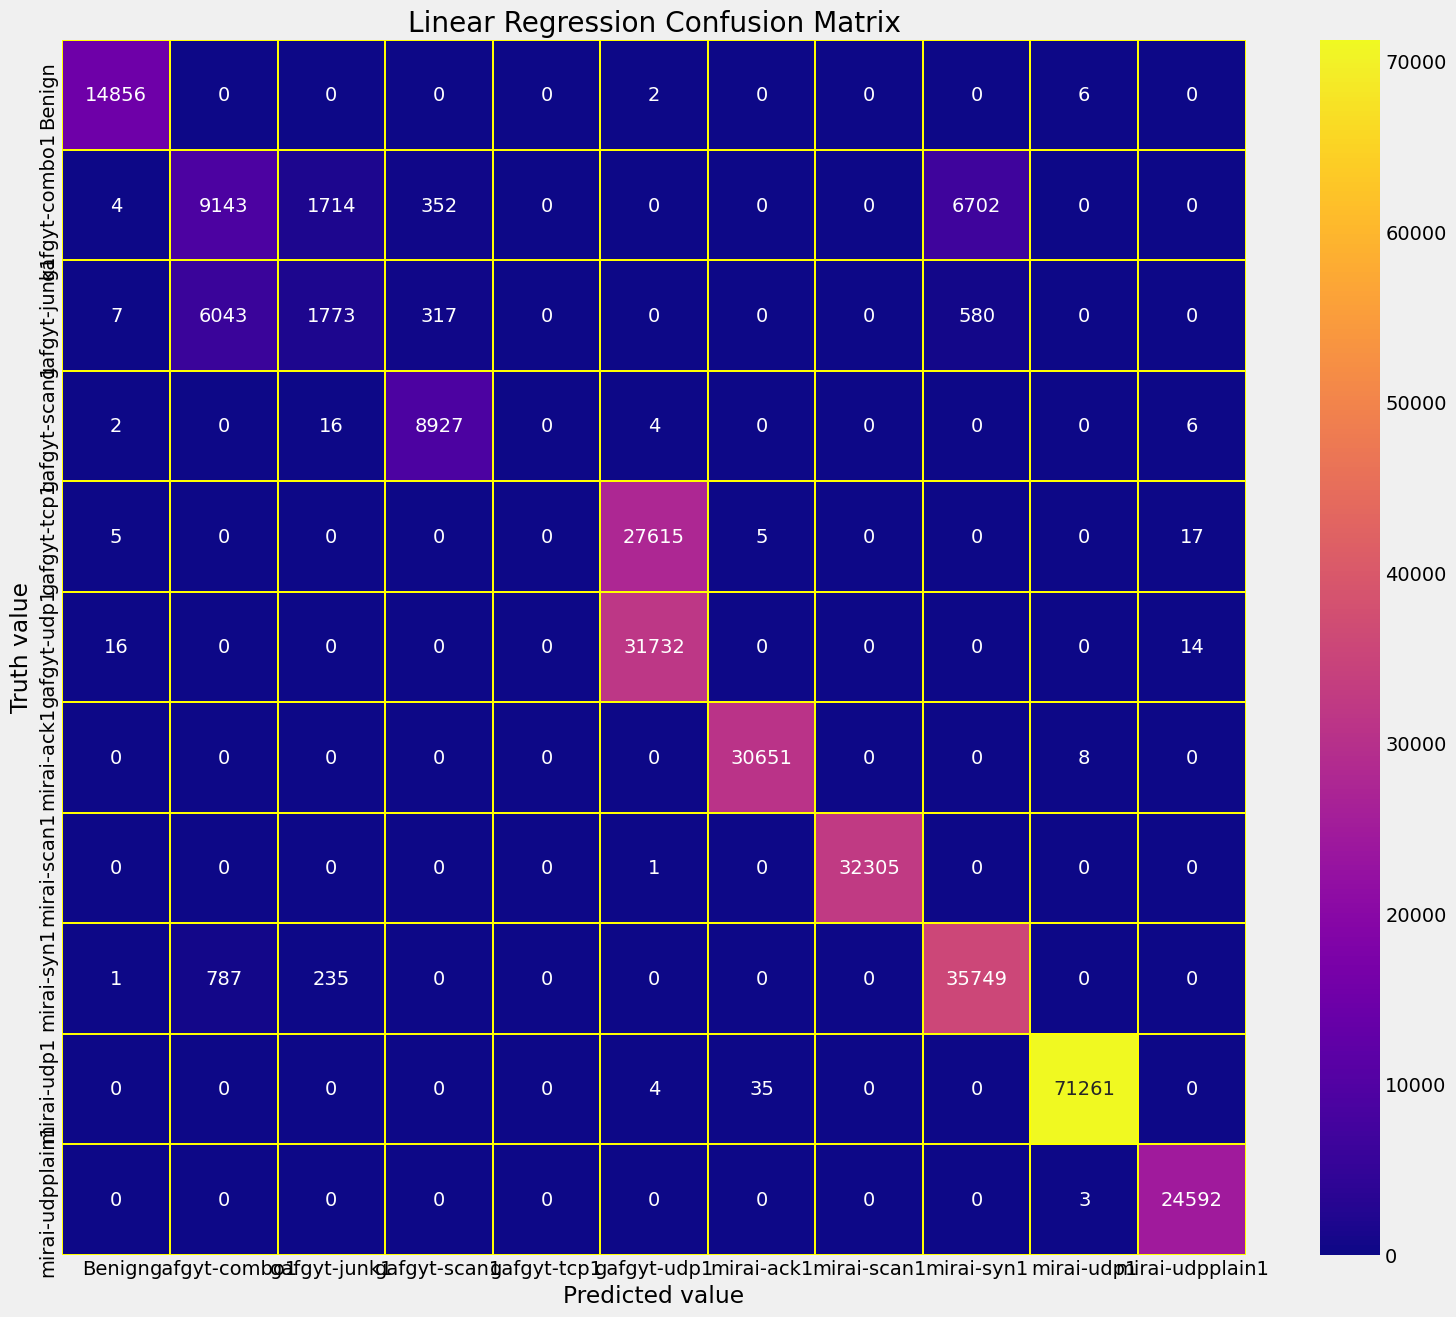

In [121]:
cm = confusion_matrix(y_test, yhat)
plt.figure(figsize=cm_fig_size)
ax = plt.subplot()
sns.heatmap(cm, fmt='.0f', annot=True, linewidths=0.2, linecolor='yellow', ax=ax, cmap="plasma")
plt.xlabel('Predicted value')
plt.ylabel('Truth value')
ax.set_title('Linear Regression Confusion Matrix'); 
ax.xaxis.set_ticklabels(labelencoder.classes_); 
ax.yaxis.set_ticklabels(labelencoder.classes_);
plt.show()

In [122]:
svc = SVC(gamma='auto', max_iter=1000)  # Set max_iter to a reasonable number

In [123]:
svc.fit(x_train_fs,y_train)

SVC(gamma='auto', max_iter=1000)

In [124]:
yhat = svc.predict(x_test_fs)

In [125]:
svm_accuracy = accuracy_score(y_test, yhat)*100
print('Accuracy: %.2f' % (svm_accuracy))

Accuracy: 83.02


In [126]:
print(classification_report(y_test, yhat, target_names=labelencoder.classes_))

                 precision    recall  f1-score   support

         Benign       0.39      0.00      0.00     14864
  gafgyt-combo1       0.74      0.77      0.76     17915
   gafgyt-junk1       0.48      0.43      0.46      8720
   gafgyt-scan1       0.99      1.00      0.99      8955
    gafgyt-tcp1       0.01      0.00      0.00     27642
    gafgyt-udp1       0.43      1.00      0.60     31762
     mirai-ack1       1.00      0.99      0.99     30659
    mirai-scan1       1.00      1.00      1.00     32306
     mirai-syn1       1.00      1.00      1.00     36772
     mirai-udp1       0.99      1.00      1.00     71300
mirai-udpplain1       1.00      1.00      1.00     24595

       accuracy                           0.83    305490
      macro avg       0.73      0.75      0.71    305490
   weighted avg       0.79      0.83      0.79    305490



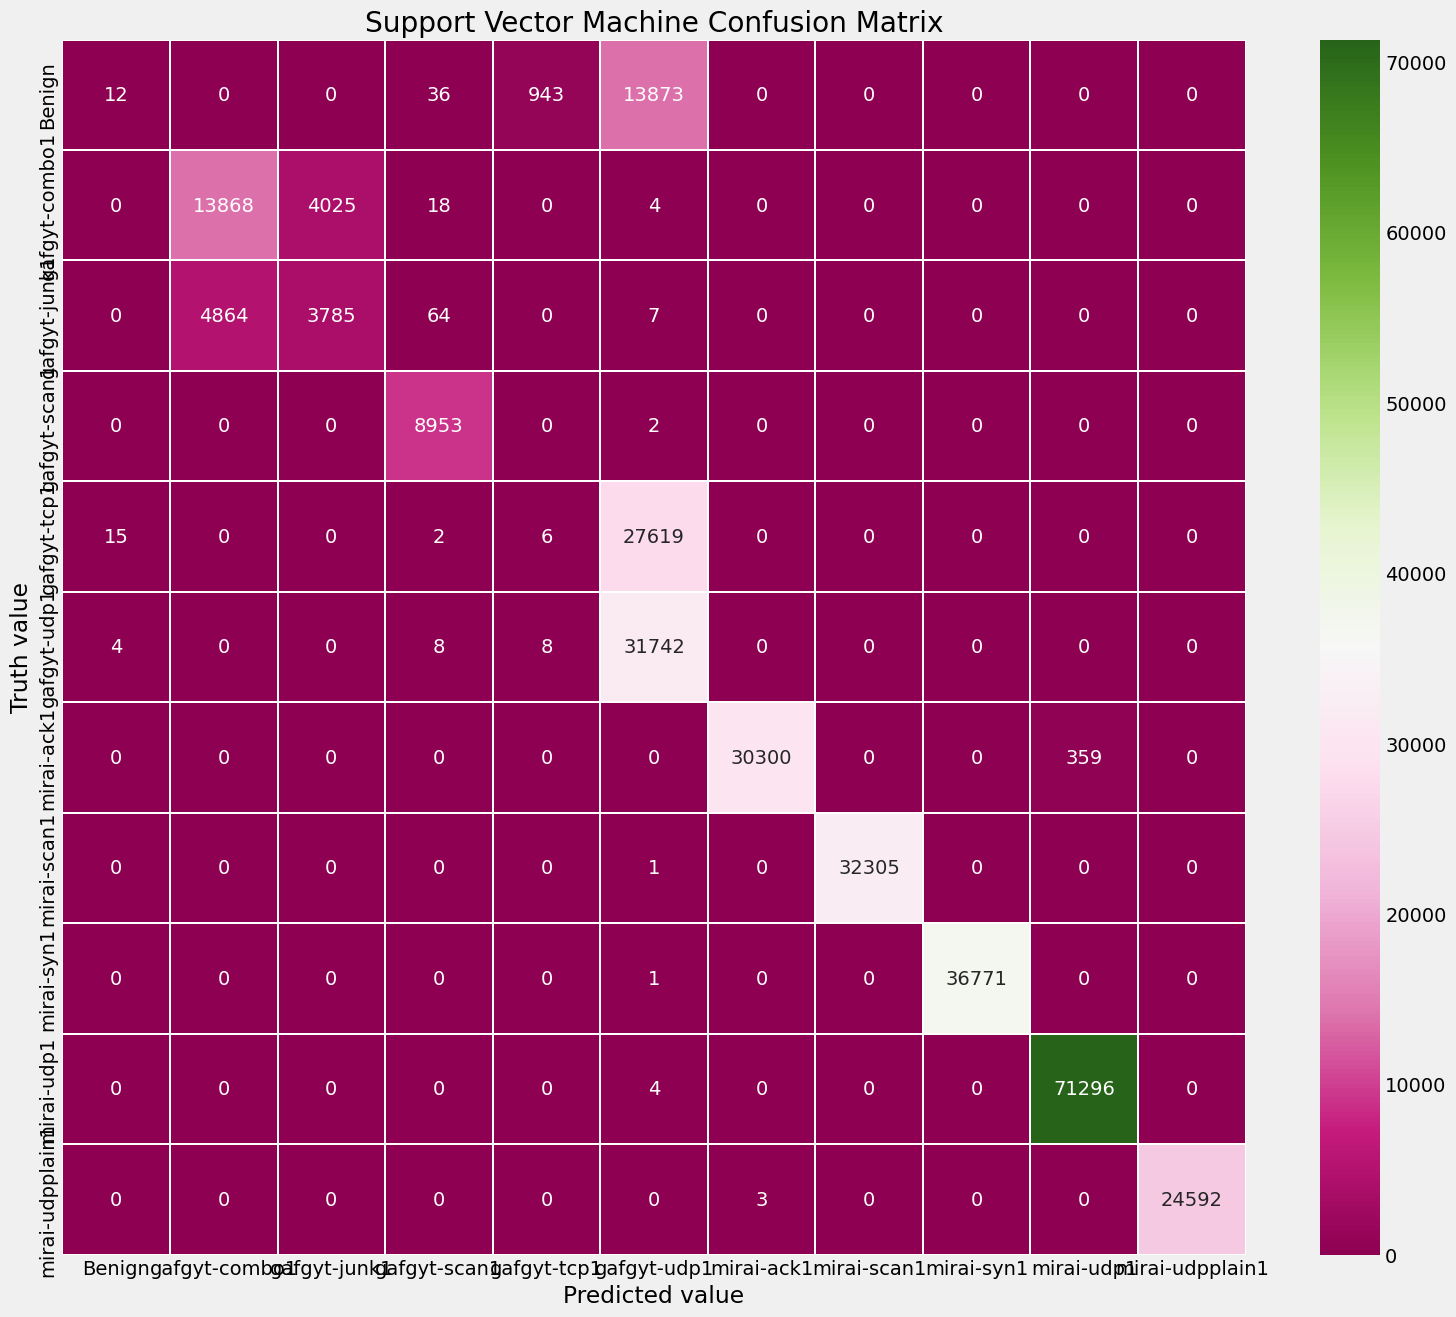

In [127]:
cm = confusion_matrix(y_test, yhat)
plt.figure(figsize=cm_fig_size)
ax = plt.subplot()
sns.heatmap(cm, fmt='.0f', annot=True, linewidths=0.2, linecolor='white', ax=ax, cmap="PiYG")
plt.xlabel('Predicted value')
plt.ylabel('Truth value')
ax.set_title('Support Vector Machine Confusion Matrix'); 
ax.xaxis.set_ticklabels(labelencoder.classes_); 
ax.yaxis.set_ticklabels(labelencoder.classes_);
plt.show()

In [128]:
rf = RandomForestClassifier(n_estimators=50)

In [129]:
rf.fit(x_train_fs, y_train)

RandomForestClassifier(n_estimators=50)

In [130]:
yhat = rf.predict(x_test_fs)

In [131]:
rf_accuracy = accuracy_score(y_test, yhat) * 100
print('Accuracy: %.2f' % (rf_accuracy))

Accuracy: 90.95


In [132]:
print(classification_report(y_test, yhat, target_names=labelencoder.classes_))

                 precision    recall  f1-score   support

         Benign       1.00      1.00      1.00     14864
  gafgyt-combo1       1.00      1.00      1.00     17915
   gafgyt-junk1       1.00      1.00      1.00      8720
   gafgyt-scan1       1.00      1.00      1.00      8955
    gafgyt-tcp1       0.80      0.00      0.00     27642
    gafgyt-udp1       0.53      1.00      0.70     31762
     mirai-ack1       1.00      1.00      1.00     30659
    mirai-scan1       1.00      1.00      1.00     32306
     mirai-syn1       1.00      1.00      1.00     36772
     mirai-udp1       1.00      1.00      1.00     71300
mirai-udpplain1       1.00      1.00      1.00     24595

       accuracy                           0.91    305490
      macro avg       0.94      0.91      0.88    305490
   weighted avg       0.93      0.91      0.88    305490



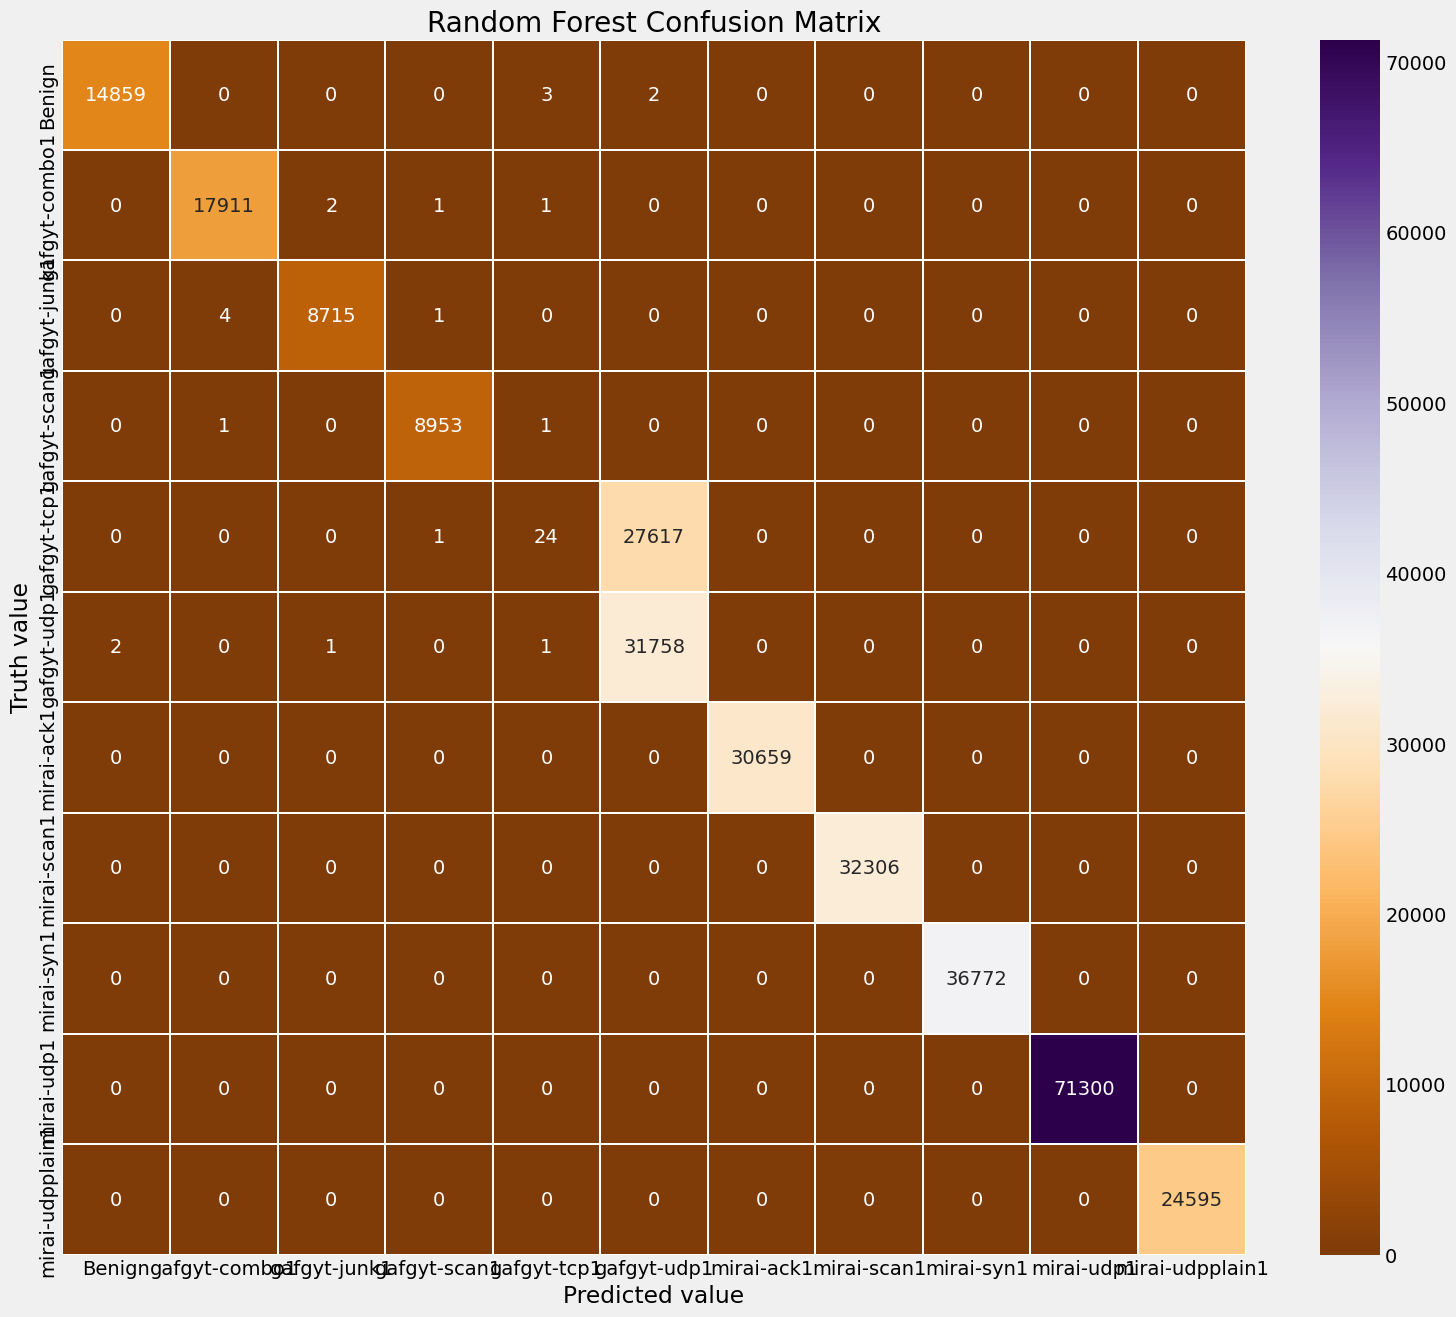

In [133]:
cm = confusion_matrix(y_test, yhat)
plt.figure(figsize=cm_fig_size)
ax = plt.subplot()
sns.heatmap(cm, fmt='.0f', annot=True, linewidths=0.2, linecolor='white', ax=ax, cmap="PuOr")
plt.xlabel('Predicted value')
plt.ylabel('Truth value')
ax.set_title('Random Forest Confusion Matrix'); 
ax.xaxis.set_ticklabels(labelencoder.classes_); 
ax.yaxis.set_ticklabels(labelencoder.classes_);
plt.show()

In [134]:
labels_full=pd.get_dummies(sub_attack_opt3_df['target'], prefix='type')

In [135]:
labels=labels_full.values
labels

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False]])

In [136]:
labels.shape[1], y_test.shape

(11, (305490,))

In [137]:
x_train_fs.shape[1]

20

In [138]:
y_train,y_test

(84621     9
 79102     6
 5800      0
 228353    9
 211100    9
          ..
 12704     6
 95097     8
 104591    8
 167773    9
 60842     7
 Name: target, Length: 712808, dtype: int32,
 19935     1
 190613    9
 24425     5
 52760     5
 66504     9
          ..
 12889     7
 13971     8
 81034     7
 92974     5
 164450    9
 Name: target, Length: 305490, dtype: int32)

In [139]:
y_train = to_categorical(y_train, len(labelencoder.classes_))
y_test_dl = to_categorical(y_test, len(labelencoder.classes_))

In [140]:
y_test_dl

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [141]:
x_train_fs

array([[4.26825912e-01, 3.06891545e-01, 6.18101779e-01, ...,
        3.99152594e-01, 6.38456380e-01, 4.57220922e-01],
       [4.13300296e-01, 3.39665501e-01, 6.20968694e-01, ...,
        4.19431084e-01, 6.55000607e-01, 4.79013565e-01],
       [4.84694059e-02, 9.06330784e-07, 1.83757582e-04, ...,
        9.69849688e-04, 6.31879497e-02, 2.42501863e-03],
       ...,
       [9.98331179e-03, 2.79997103e-04, 7.70947278e-01, ...,
        3.22766326e-04, 1.85476265e-02, 3.61886424e-04],
       [3.20163256e-01, 3.51668248e-01, 6.95667787e-01, ...,
        4.04042837e-01, 6.39553918e-01, 4.56644642e-01],
       [1.13154509e-04, 6.76262149e-07, 1.84335389e-01, ...,
        5.77525742e-06, 2.80299788e-04, 6.08891713e-06]])

In [142]:
def create_nn_model():
    model = Sequential()
    model.add(Dense(10, input_dim=x_train_fs.shape[1], activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.add(Dense(labels.shape[1],activation='softmax'))
    return model

In [143]:
ann_model = create_nn_model()

In [144]:
ann_model.compile(loss='categorical_crossentropy', optimizer='adam')

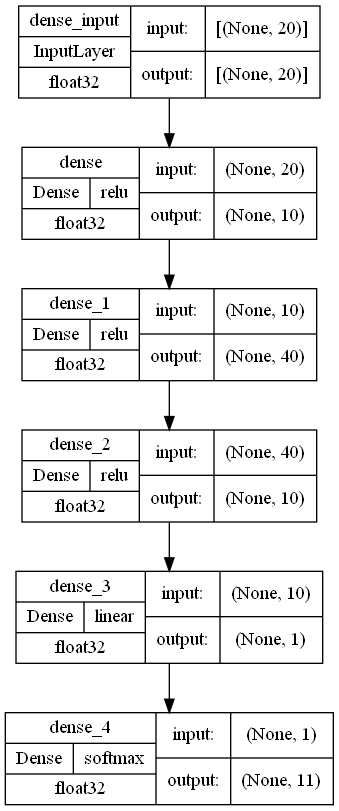

In [149]:
plot_model(ann_model,to_file="ann_nn_architecture.png", show_shapes=True, show_dtype=True, show_layer_activations=True)

In [145]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto')

In [146]:
ann_model.fit(x_train_fs,y_train,validation_data=(x_test_fs,y_test_dl),
          callbacks=[monitor],verbose=2,epochs=500)

Epoch 1/500
22276/22276 - 41s - 2ms/step - loss: 0.9640 - val_loss: 0.7011
Epoch 2/500
22276/22276 - 40s - 2ms/step - loss: 0.6532 - val_loss: 0.6066
Epoch 3/500
22276/22276 - 34s - 2ms/step - loss: 0.5896 - val_loss: 0.5573
Epoch 4/500
22276/22276 - 50s - 2ms/step - loss: 0.4494 - val_loss: 0.3649
Epoch 5/500
22276/22276 - 40s - 2ms/step - loss: 0.3466 - val_loss: 0.3193
Epoch 6/500
22276/22276 - 39s - 2ms/step - loss: 0.3147 - val_loss: 0.2953
Epoch 7/500
22276/22276 - 39s - 2ms/step - loss: 0.2815 - val_loss: 0.2653
Epoch 8/500
22276/22276 - 44s - 2ms/step - loss: 0.2660 - val_loss: 0.2608
Epoch 9/500
22276/22276 - 49s - 2ms/step - loss: 0.2556 - val_loss: 0.2463
Epoch 10/500
22276/22276 - 39s - 2ms/step - loss: 0.2465 - val_loss: 0.2346
Epoch 11/500
22276/22276 - 67s - 3ms/step - loss: 0.2382 - val_loss: 0.2297
Epoch 12/500
22276/22276 - 55s - 2ms/step - loss: 0.2269 - val_loss: 0.2129
Epoch 13/500
22276/22276 - 44s - 2ms/step - loss: 0.2142 - val_loss: 0.2579
Epoch 14/500
22276/22

In [147]:
x_test.shape

(305490, 115)

In [148]:
y_pred = ann_model.predict(x_test_fs)
y_pred = np.argmax(y_pred,axis=1)
y_eval = np.argmax(y_test_dl,axis=1)
nn_model1_accuracy = metrics.accuracy_score(y_eval, y_pred) * 100
print("accuracy: {}".format(nn_model1_accuracy))

9547/9547 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step
accuracy: 90.44584110772857


In [149]:
x_train_fs[0]

array([0.42682591, 0.30689154, 0.61810178, 0.5122917 , 0.30998031,
       0.80391696, 0.64190242, 0.3991526 , 0.63853292, 0.45722129,
       0.42686496, 0.30689154, 0.61808395, 0.5122813 , 0.3099799 ,
       0.80389624, 0.64210245, 0.39915259, 0.63845638, 0.45722092])

In [150]:
print(classification_report(y_test_dl.argmax(axis=1), y_pred, target_names=labelencoder.classes_))

                 precision    recall  f1-score   support

         Benign       1.00      1.00      1.00     14864
  gafgyt-combo1       0.96      0.96      0.96     17915
   gafgyt-junk1       0.91      0.92      0.92      8720
   gafgyt-scan1       0.99      1.00      1.00      8955
    gafgyt-tcp1       0.85      0.00      0.00     27642
    gafgyt-udp1       0.53      1.00      0.70     31762
     mirai-ack1       1.00      1.00      1.00     30659
    mirai-scan1       1.00      1.00      1.00     32306
     mirai-syn1       1.00      1.00      1.00     36772
     mirai-udp1       1.00      1.00      1.00     71300
mirai-udpplain1       1.00      1.00      1.00     24595

       accuracy                           0.90    305490
      macro avg       0.93      0.90      0.87    305490
   weighted avg       0.93      0.90      0.87    305490



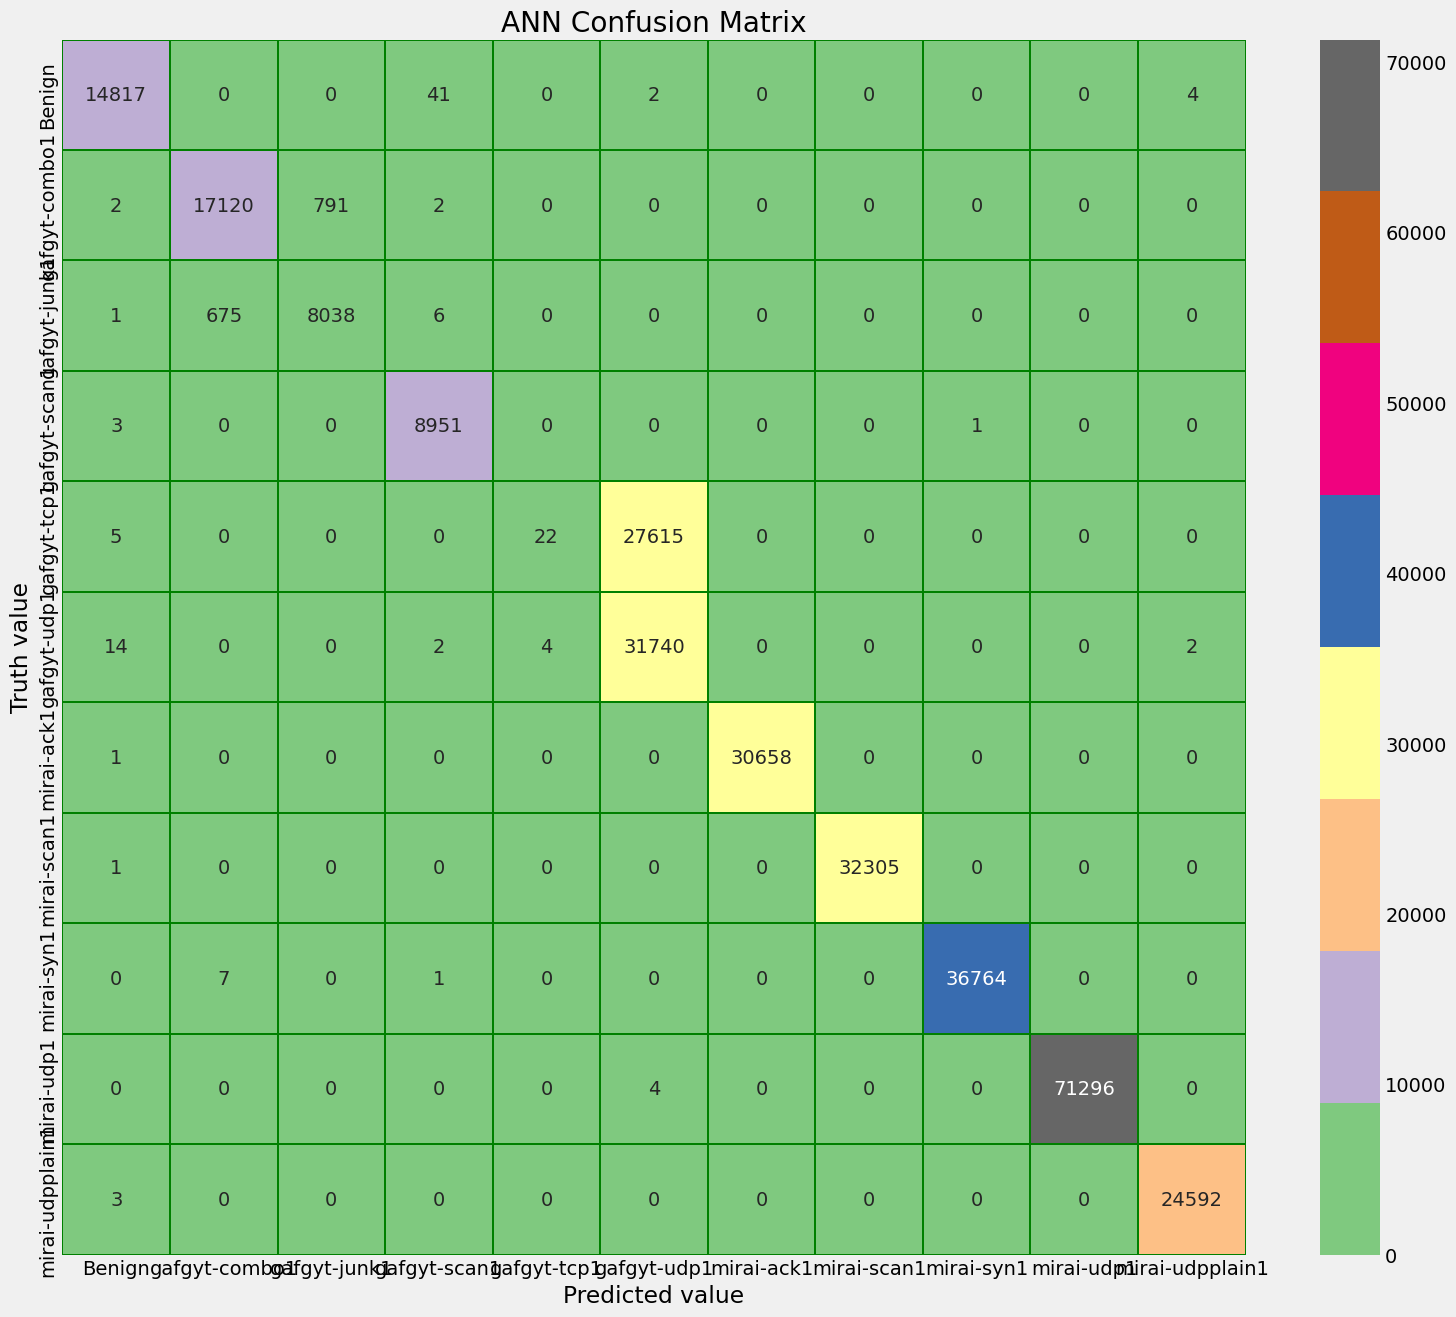

In [151]:
cm = confusion_matrix(y_test_dl.argmax(axis=1), y_pred)
plt.figure(figsize=cm_fig_size)
ax = plt.subplot()
sns.heatmap(cm, fmt='.0f', annot=True, linewidths=0.2, linecolor='green', ax=ax, cmap="Accent")
plt.xlabel('Predicted value')
plt.ylabel('Truth value')
ax.set_title('ANN Confusion Matrix'); 
ax.xaxis.set_ticklabels(labelencoder.classes_); 
ax.yaxis.set_ticklabels(labelencoder.classes_);
plt.show()

In [152]:
def create_cnn_lstm_model():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=5, strides=1, padding='same', input_shape = (x_train_fs.shape[1], 1)))
    model.add(Conv1D(filters=32, kernel_size=5, strides=1, padding='same'))
    model.add(LSTM(32, activation = 'relu', return_sequences=True))
    model.add(LSTM(16, return_sequences=True))  
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(labels.shape[1],activation='softmax'))
    return model

In [153]:
model = create_cnn_lstm_model()

In [154]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

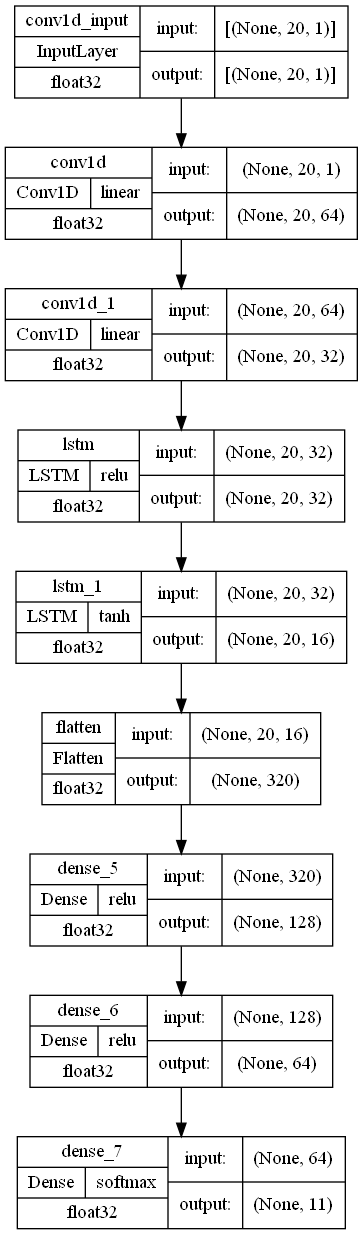

In [160]:
plot_model(model,to_file="cnn-lstm.png", show_shapes=True, show_dtype=True, show_layer_activations=True)

In [155]:
model.fit(x_train_fs,y_train,validation_data=(x_test_fs,y_test_dl),
          callbacks=[monitor],verbose=2,epochs=500)

Epoch 1/500
22276/22276 - 377s - 17ms/step - accuracy: 0.8272 - loss: 0.3349 - val_accuracy: 0.8826 - val_loss: 0.1992
Epoch 2/500
22276/22276 - 234s - 10ms/step - accuracy: 0.8687 - loss: 0.2345 - val_accuracy: 0.8471 - val_loss: 0.2749
Epoch 3/500
22276/22276 - 233s - 10ms/step - accuracy: 0.8816 - loss: 0.1984 - val_accuracy: 0.8849 - val_loss: 0.1894
Epoch 4/500
22276/22276 - 237s - 11ms/step - accuracy: 0.8844 - loss: 0.1908 - val_accuracy: 0.8773 - val_loss: 0.1728
Epoch 5/500
22276/22276 - 239s - 11ms/step - accuracy: 0.8876 - loss: 0.1817 - val_accuracy: 0.8363 - val_loss: 0.3234
Epoch 5: early stopping


In [156]:
y_pred = model.predict(x_test_fs)
y_pred = np.argmax(y_pred,axis=1)
y_eval = np.argmax(y_test_dl,axis=1)
nn_model2_accuracy = metrics.accuracy_score(y_eval, y_pred) * 100
print("accuracy: {}".format(nn_model2_accuracy))

9547/9547 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step
accuracy: 83.62794199482798


In [157]:
y_test_dl.argmax(axis=1)

array([1, 9, 5, ..., 7, 5, 9], dtype=int64)

In [158]:
y_pred

array([2, 9, 5, ..., 7, 5, 9], dtype=int64)

In [159]:
print(classification_report(y_test_dl.argmax(axis=1), y_pred, target_names=labelencoder.classes_))

                 precision    recall  f1-score   support

         Benign       1.00      1.00      1.00     14864
  gafgyt-combo1       0.80      0.92      0.86     17915
   gafgyt-junk1       0.77      0.54      0.63      8720
   gafgyt-scan1       1.00      1.00      1.00      8955
    gafgyt-tcp1       0.79      0.00      0.00     27642
    gafgyt-udp1       0.53      1.00      0.70     31762
     mirai-ack1       1.00      0.45      0.62     30659
    mirai-scan1       1.00      1.00      1.00     32306
     mirai-syn1       1.00      1.00      1.00     36772
     mirai-udp1       0.81      1.00      0.89     71300
mirai-udpplain1       1.00      1.00      1.00     24595

       accuracy                           0.84    305490
      macro avg       0.88      0.81      0.79    305490
   weighted avg       0.87      0.84      0.80    305490



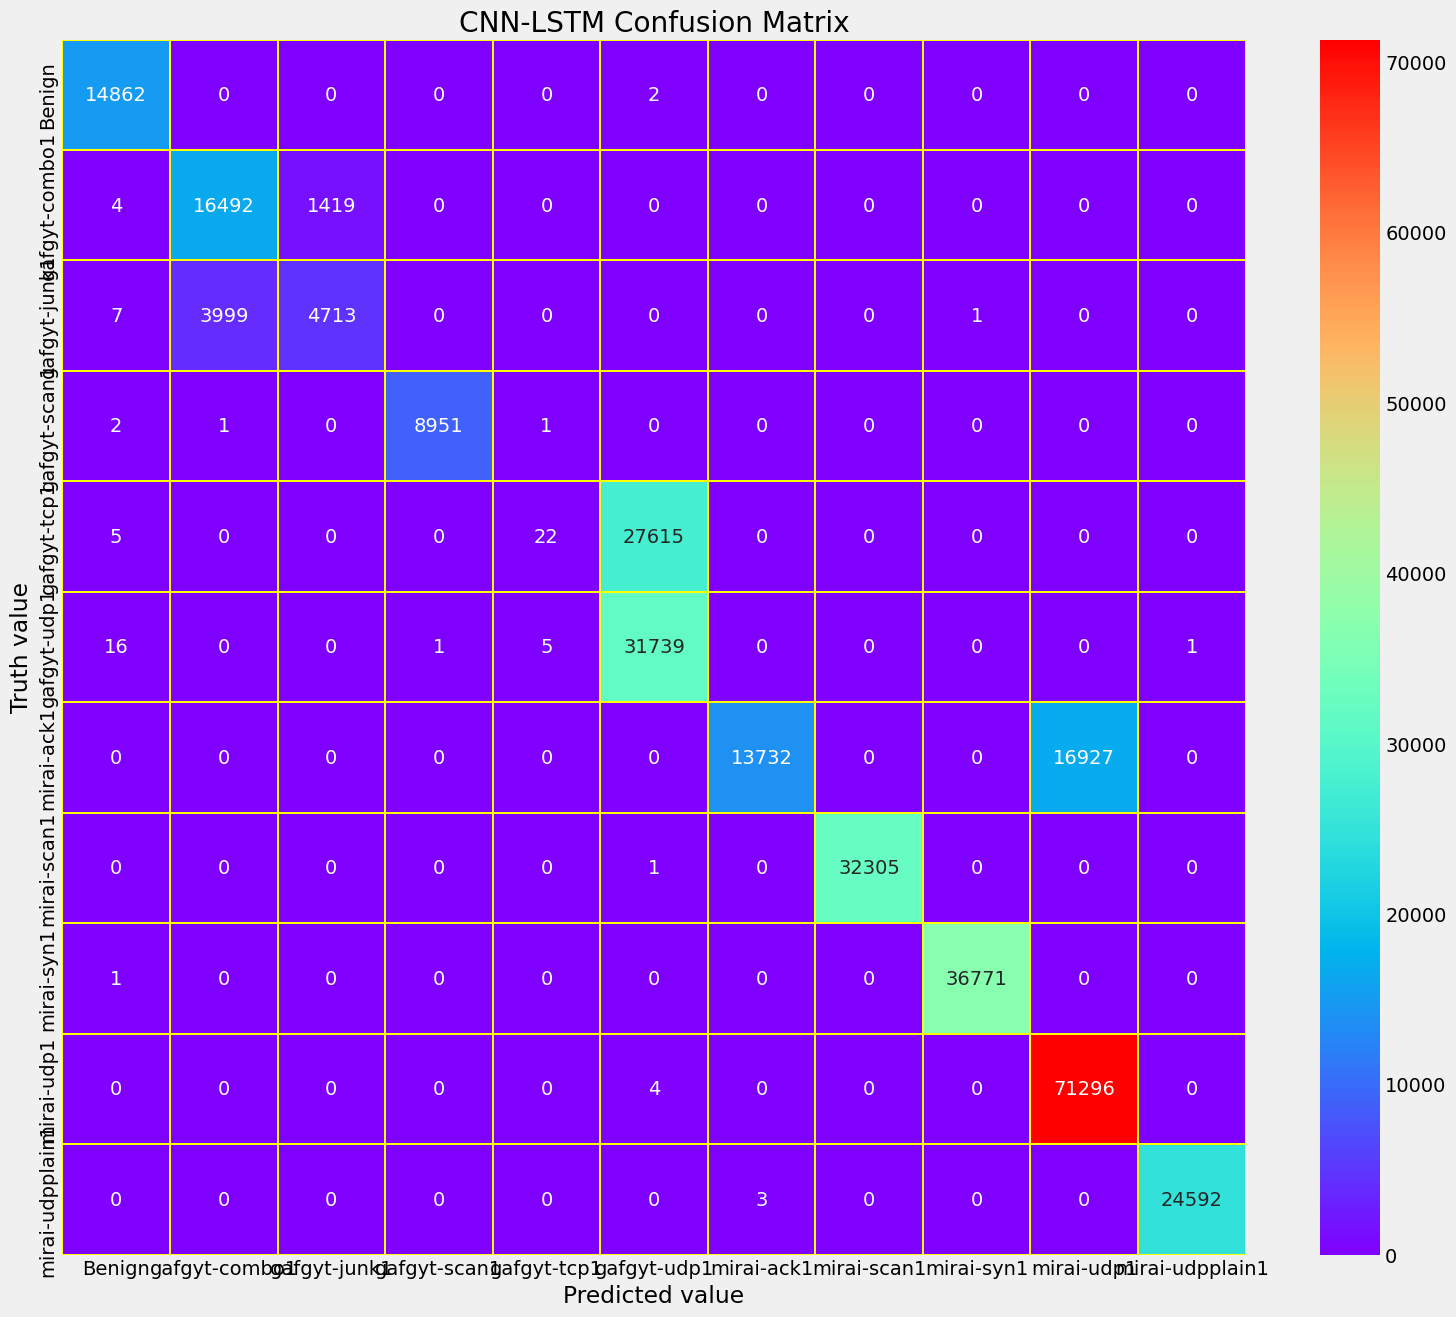

In [160]:
cm = confusion_matrix(y_test_dl.argmax(axis=1), y_pred)
plt.figure(figsize=cm_fig_size)
ax = plt.subplot()
sns.heatmap(cm, fmt='.0f', annot=True, linewidths=0.2, linecolor='yellow', ax=ax, cmap="rainbow")
plt.xlabel('Predicted value')
plt.ylabel('Truth value')
ax.set_title('CNN-LSTM Confusion Matrix'); 
ax.xaxis.set_ticklabels(labelencoder.classes_); 
ax.yaxis.set_ticklabels(labelencoder.classes_);
plt.show()

In [161]:
accuracy_avg = (lr_accuracy + rf_accuracy + svm_accuracy + nn_model1_accuracy + nn_model2_accuracy) / 5

In [163]:
display(HTML("<h6 class='messagebox messagelightgreen'>All Models Accuracy Average is  <b>{0}</b></h6>".format(accuracy_avg)))

In [162]:
from sklearn.decomposition import PCA

In [163]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [188]:
pca = PCA(n_components=12)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [189]:
lr_cls = LogisticRegression(solver='liblinear', C=0.2)
lr_cls.fit(x_train_pca, y_train)
yhat_lr = lr_cls.predict(x_test_pca)
lr_accuracy = accuracy_score(y_test, yhat_lr) * 100
print('Logistic Regression Accuracy: %.2f' % lr_accuracy)


Logistic Regression Accuracy: 84.99


In [166]:
# SVM
svc = SVC(gamma='scale', max_iter=1000, C=1.0)
svc.fit(x_train_pca, y_train)
yhat_svc = svc.predict(x_test_pca)
svm_accuracy = accuracy_score(y_test, yhat_svc) * 100
print('SVM Accuracy: %.2f' % svm_accuracy)

SVM Accuracy: 83.26


In [190]:
# Random Forest
rf = RandomForestClassifier(n_estimators=50)
rf.fit(x_train_pca, y_train)
yhat_rf = rf.predict(x_test_pca)
rf_accuracy = accuracy_score(y_test, yhat_rf) * 100
print('Random Forest Accuracy: %.2f' % rf_accuracy)

Random Forest Accuracy: 90.46


In [168]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [169]:
# Neural Network
y_train_dl = to_categorical(y_train, len(labelencoder.classes_))
y_test_dl = to_categorical(y_test, len(labelencoder.classes_))

In [183]:
def create_nn_model():
    model = Sequential()
    model.add(Dense(10, input_dim=x_train_pca.shape[1], activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.add(Dense(labels.shape[1], activation='softmax'))
    return model

In [191]:
def create_nn_model():
    model = Sequential()
    model.add(Dense(16, input_dim=x_train_pca.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(labels.shape[1], activation='softmax'))
    return model

In [192]:
ann_model = create_nn_model()
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [193]:
# Train the NN model
ann_model.fit(x_train_pca, y_train_dl, epochs=15, batch_size=20, verbose=0)

In [186]:
# Evaluate the NN model
_, nn_model_accuracy = ann_model.evaluate(x_test_pca, y_test_dl, verbose=0)
nn_model_accuracy *= 100
print('Neural Network Accuracy: %.2f' % nn_model_accuracy)

Neural Network Accuracy: 89.06


In [194]:
y_pred = ann_model.predict(x_test_pca)

9547/9547 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step


In [176]:
y_pred = np.argmax(y_pred,axis=1)
y_eval = np.argmax(y_test_dl,axis=1)
nn_model2_accuracy = metrics.accuracy_score(y_eval, y_pred) * 100
print("accuracy: {}".format(nn_model2_accuracy))

accuracy: 90.4245638155095


In [187]:
# Calculate average accuracy
accuracy_avg = (lr_accuracy + rf_accuracy + svm_accuracy + nn_model_accuracy) / 4
print('Average Accuracy using PCA: %.2f' % accuracy_avg)

Average Accuracy using PCA: 87.21


In [195]:
display(HTML("<h6 class='messagebox messagelightgreen'>All Models Accuracy Average is  <b>{0}</b></h6>".format(accuracy_avg)))

## Using PRINCIPAL COMPONENT ANALYSIS (PCA)